# Introduction à la classification et au sur-apprentissage

# Table of contents
1. [Échiquier](#part1)
1. [Chiffres manuscrits](#part2)
1. [Classifieur du plus proche représentant](#part3)
1. [Sur et sous-apprentissage](#part4)


# Échiquier <a id="part1"></a>


<div class="alert alert-block alert-info">

Importer le module `numpy` sous l'acronyme `np`.
<!-- <br> -->
</div>

In [ ]:
# Answer

<div class="alert alert-block alert-info">

Générer une matrice `X` de taille $50 \times 2$ dont chaque ligne représente un point choisi aléatoirement dans le carré $[0, 1] \times [0, 1]$ (`np.random.rand`).
<!-- <br> -->
</div>

In [ ]:
# Answer

<div class="alert alert-block alert-info">

Afficher la taille de la matrice `X` (grâce à l'attribut `shape`), ainsi que sa première ligne (qui correspond donc au premier point du jeu de données).
<!-- <br> -->
</div>

In [ ]:
# Answer

<div class="alert alert-block alert-info">

Afficher les points du jeu de données avec `plt.scatter`.
<!-- <br> -->
</div>

In [ ]:
# Answer
import matplotlib.pyplot as plt
%matplotlib inline

# Todo

# End todo
plt.axis('image');

<div class="alert alert-block alert-info">

Nous créons à présent une liste `targets` de taille $50$ indiquant pour chaque point sont appartenance à la classe 0 ou à la classe 1.

Reprendre l'affichage précédent en changeant la couleur des points en fonction de leur classe (paramètre `c=` de `plt.scatter`).
</div>

In [5]:
targets = (3 * X).sum(axis=1, dtype=int) % 2
targets

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0])

In [ ]:
# Answer

<div class="alert alert-block alert-info">

Entraîner un arbres de décision (*scikit learn decision tree*) sur les données `(X, targets)`.
<!-- <br> -->
</div>

In [ ]:
# Answer
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
tree = DecisionTreeClassifier()
# Fit the model
# Todo

# End todo

<div class="alert alert-block alert-info">

Vérifier l'adéquation entre les étiquettes réelles `targets` et les valeurs prédites en réaffichant les points par couleur et les zones de classification avec la fonction ci-dessous.
<!-- <br> -->
</div>

In [8]:
from matplotlib import cm

def map_regions(clf, data=None, num=500):
    """
        Map the regions f(x)=1…K of the classifier clf within the same range as the one
        of the data.
        Input:
            clf: classifier with a method predict
            data: input data (X)
            num: discretization parameter
    """
    xmin, ymin = data.min(axis=0)
    xmax, ymax = data.max(axis=0)
    x, y = np.meshgrid(np.linspace(xmin, xmax, num), np.linspace(ymin, ymax))
    z = clf.predict(np.c_[x.ravel(), y.ravel()]).reshape(x.shape)
    zmin, zmax = z.min(), z.max()
    plt.imshow(z, origin='lower', interpolation="nearest",
               extent=[xmin, xmax, ymin, ymax], cmap=cm.coolwarm,
              alpha=0.3)

In [ ]:
# Answer

<div class="alert alert-block alert-info">

Générer un nouveau jeu de données comme précédemment et vérifier les prédictions, d'abord visuellement puis avec la méthode `tree.score`.
<!-- <br> -->
</div>

In [10]:
tree.score?

Signature: tree.score(X, y, sample_weight=None)
Docstring:
Return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy
which is a harsh metric since you require for each sample that
each label set be correctly predicted.

Parameters
----------
X : array-like of shape (n_samples, n_features)
    Test samples.

y : array-like of shape (n_samples,) or (n_samples, n_outputs)
    True labels for `X`.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

Returns
-------
score : float
    Mean accuracy of ``self.predict(X)`` w.r.t. `y`.
File:      ~/p3venv/lib/python3.12/site-packages/sklearn/base.py
Type:      method

In [ ]:
# Answer

# Chiffres manuscrits <a id="part2"></a>


<div class="alert alert-block alert-info">

Chargeons le jeu de données `digits` de scikit-learn.
<!-- <br> -->
</div>

In [13]:
from sklearn.datasets import load_digits

digits = load_digits()

data = digits.data
target = digits.target

<div class="alert alert-block alert-info">
    Afficher ses caractéristiques (nombre d'individus, nombre de variables, nombre de catégories).
<!-- <br> -->
</div>

In [ ]:
# Answer

<div class="alert alert-block alert-info">
    Afficher quelques chiffres extraits du jeu de données.
<!-- <br> -->
</div>

In [15]:
def image(ligne):
    return ligne.reshape(8, 8)

def display(ligne):
    matrix = image(ligne)
    plt.imshow(16-matrix, cmap='gray')

In [16]:
data[0, :]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [17]:
image(data[0, :])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
# Answer

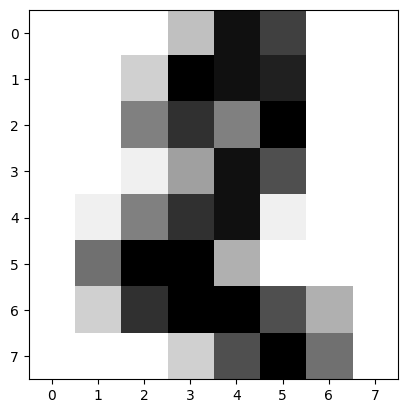

In [19]:
display(data[2, :])

In [ ]:
# Answer
m = 10
indexes = np.random.permutation(data.shape[0])[:m]

plt.figure(figsize=(m*2, 2))
for i in range(len(indexes)):
    plt.subplot(1, m, i+1)
    # Todo

    # End todo

<div class="alert alert-block alert-info">
    Afficher les « chiffres moyens ».
<!-- <br> -->
</div>

In [ ]:
# Answer

<div class="alert alert-block alert-info">
    Séparer le jeu de données en deux et évaluer la performance de l'arbre de décision.
<!-- <br> -->
</div>

In [ ]:
# Answer
n = data.shape[0]
randomize = np.random.permutation(n)

train_data, train_target = data[randomize[:n//2]], target[randomize[:n//2]]
test_data, test_target = data[randomize[n//2:]], target[randomize[n//2:]]

# Create and fit the decision tree
# Todo

# End todo

In [ ]:
# Answer

<div class="alert alert-block alert-info">
    Décoder le code postal suivant.
<!-- <br> -->
</div>

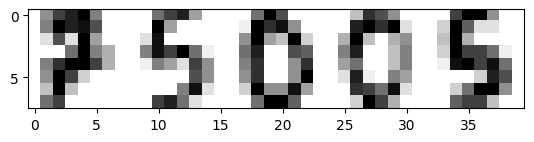

In [25]:
zipcode = np.concatenate([data[target==int(d)][np.random.choice(np.sum(target==int(d)), 1)].reshape(8, -1) for d in '75005'], axis=1)
plt.imshow(16-zipcode, cmap='gray')

In [ ]:
# Answer
decode = ''
for i in range(5):
    row = zipcode[:, i*8:(i+1)*8].reshape(1, -1)
    # Prediction pred
    # Todo

    # End todo
    decode += str(pred[0])
print(decode)

# Classifieur du plus proche représentant <a id="part3"></a>


<div class="alert alert-block alert-info">
    Implémenter un classifieur du plus proche représentant (moyen).
<!-- <br> -->
</div>

In [ ]:
# Answer

# Sur et sous-apprentissage <a id="part4"></a>


<div class="alert alert-block alert-info">

Nous souhaitons analyser la régression polynomiale pour différents degrés.
Pour ce faire, générer des données sinusoïdale avec un bruit gaussien additif (`np.random.randn`).
<!-- <br> -->
</div>

In [30]:
import seaborn
seaborn.set()

In [ ]:
# Answer
def f(x):
    return np.sin(np.pi*x)

x = np.random.rand(30)

# Todo

# End todo

plt.scatter(x, y)

<div class="alert alert-block alert-info">
    Afficher les données et la fonction (inconnue) à estimer.
<!-- <br> -->
</div>

In [ ]:
# Answer
t = np.linspace(0, 1, num=200)

# Todo

# End todo

<div class="alert alert-block alert-info">
    Effectuer une régression linéaire (avec scikit-learn).
<!-- <br> -->
</div>

In [ ]:
# Answer
from sklearn.linear_model import LinearRegression

# Nécessaire de redimensionner pour coller aux standards de scikit-learn
X = x.reshape(-1, 1)
T = t.reshape(-1, 1)

reg = LinearRegression()
# Fit the model
# Todo

# End todo

# Todo

# End todo

<div class="alert alert-block alert-info">

Comparer (avec le même type d'affichages) différents degrés de régression polynomiale.
<!-- <br> -->
</div>

In [34]:
def polynomial(x, degree):
    return np.concatenate([x**d for d in range(1, degree+1)], axis=1)

In [ ]:
# Answer
plt.scatter(x, y)
ylim = plt.ylim()
for degree in [2, 5, 10]:
    # Todo

    # End todo
    
# plt.plot(t, f(t), label='Unknown function')
plt.ylim(*ylim)
plt.legend();

<div class="alert alert-block alert-info">
    Afficher le $R^2$ score pour chacun des modèles, sur l'ensemble d'apprentissage et en validation croisée.
<!-- <br> -->
</div>

In [ ]:
# Answer
from sklearn.model_selection import cross_val_score

for degree in [2, 5, 10]:
    reg.fit(polynomial(X, degree), y)
    print("Degré", degree)
    # Todo

    # End todo
    print("   R2 validation croisée :", cross_val_score(reg, polynomial(X, degree), y).mean())